# (LATE) Applied Machine Learning HW 1
Virginia Lu - vl239<br/>
Sylvia Nie - hn327

## 1. Digit Recognizer

<b/>(a) Joined Digit Recognizer competition on Kaggle</b><br/><br/>
<b/>(b) Write a function to display an MNIST digit. Display one of each digit.</b> <br/><br/>
To display each of the MNIST digits, I wrote a function which took as an input parameter a 28x28 array containing each of the pixel values for a single digit, mapped the RGB values to gray scale, and plotted the resulting image.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#1b
def display_MNIST(pixels):
    plt.imshow(pixels, cmap='Greys')
    plt.show()  

Then, using numpy and matplotlib, after loading in the entire training dataset, I reshaped each of the 1x784 pixel arrays for one of each digit to be 28x28 so that I could pass them into my display_MNIST function.

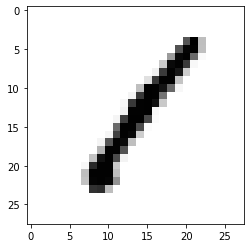

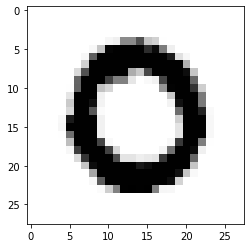

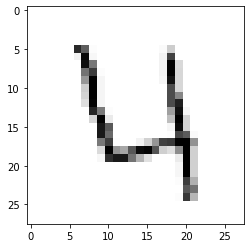

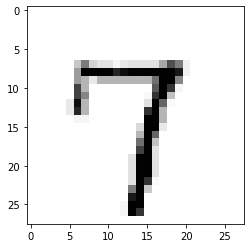

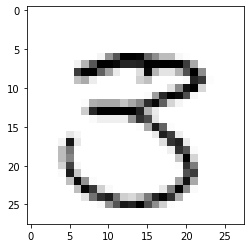

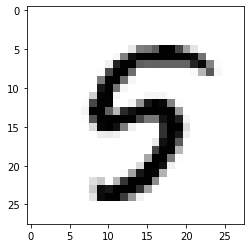

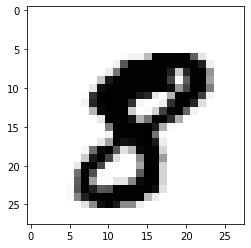

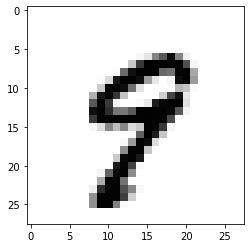

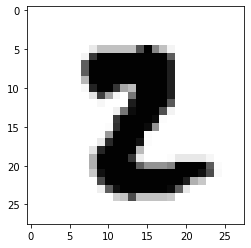

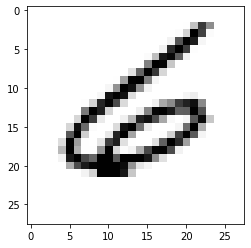

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_values = train.drop_duplicates('label')

# train_values.ix[0,1:]
for i in range(train_values.shape[0]):
    array = np.array(train_values.iloc[i,1:]).reshape((28,28))
    display_MNIST(array)

<b/>(c) Examine the prior probability of the classes in the training data. Display a normalized histogram of digit counts.</b><br/><br/>
Looking at the prior probability of each of the 10 classes for the entire training dataset shows that the data is not perfectly uniform across all digits, with 5 having the fewest samples and 1 having the most samples, i.e. 5s may prove to be classified incorrectly more than the other digits while 1s may prove to be classified correctly more than the other digits; however, the distribution overall is primarily uniform given that the histogram shows a fairly even spread across all digits.

prior probability = first array below


(array([0.09838095, 0.11152381, 0.09945238, 0.10359524, 0.09695238,
        0.09035714, 0.0985    , 0.10478571, 0.0967381 , 0.09971429]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

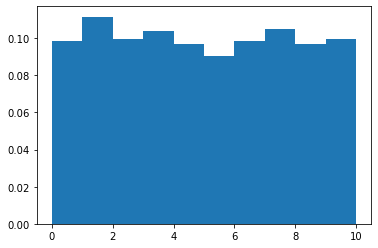

In [5]:
print('prior probability = first array below')
plt.hist(train['label'], bins = [0,1,2,3,4,5,6,7,8,9,10], density = True)

<b/>(d) Pick one example of each digit from your training data. Then, for each sample digit, compute and show the best match (nearest neighbor) between your chosen sample and the rest of the training data. Use L2 distance between the two images’ pixel values as the metric.</b><br/><br/>
First, I concatenated each of the individual samples of each digit into one 10x784 array.  Then, looping through each of the 10 sample digit rows, I calculated the L2 norm using a vectorized norm function from numpy’s linalg library to speed up processing time as opposed to looping through each of the 785 pixels for each of the 42000 training samples.  After the array of Euclidean distances was collected comparing one of the example digits to the full training set, I found the nearest neighbor by finding the example with the smallest distance and displayed the resulting sample along with the corresponding distance from the example digit.  Each of the nearest neighbors found were correct; however, in my first iteration of this I found that one of the digits was classified incorrectly as the particular example digit I used had a strong slant, so after swapping that example digit out with a more ‘average’ looking sample, all digits found a correct nearest neighbor.

The nearest neighbor of 1 is 1, which have shortest L2 distance = 489.67948701165744


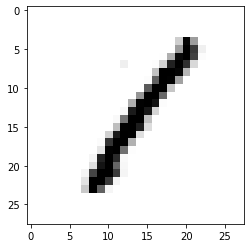

The nearest neighbor of 0 is 0, which have shortest L2 distance = 1046.5954328201515


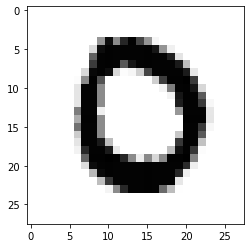

The nearest neighbor of 4 is 4, which have shortest L2 distance = 1356.8809822530493


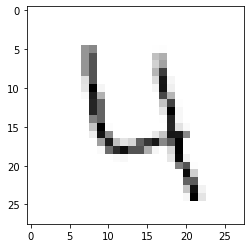

The nearest neighbor of 7 is 7, which have shortest L2 distance = 863.5010133172977


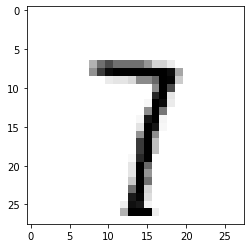

*The nearest neighbor of 3 is 5, is not perfect match, which have shortest L2 distance = 1832.6649993929605


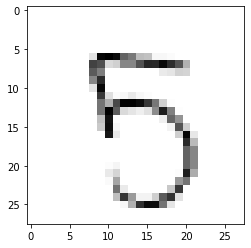

The nearest neighbor of 5 is 5, which have shortest L2 distance = 1066.3676664265472


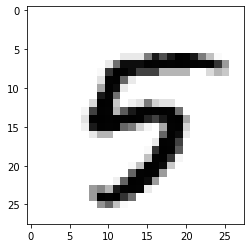

The nearest neighbor of 8 is 8, which have shortest L2 distance = 1593.7775879965184


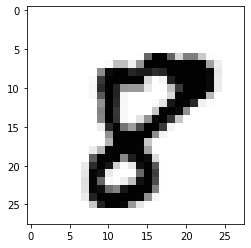

The nearest neighbor of 9 is 9, which have shortest L2 distance = 910.5767403135224


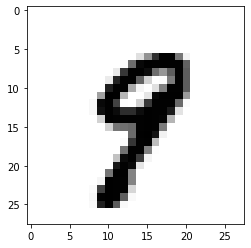

The nearest neighbor of 2 is 2, which have shortest L2 distance = 1380.877257398354


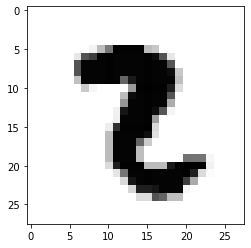

The nearest neighbor of 6 is 6, which have shortest L2 distance = 1446.5113203843239


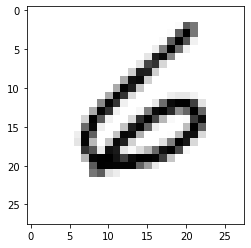

In [6]:
for i in range(train_values.shape[0]):
    dist_array = []
    for j in range(train.shape[0]):
        dist = np.linalg.norm(train_values.values[i][1:] - train.values[j][1:])
        dist_array.append(dist)
    nearst_dist = min(filter(lambda x: x > 0, dist_array))
    nearest_dist_index = dist_array.index(nearst_dist)
    target = train_values.values[i][0]
    nearest_value = train.values[nearest_dist_index][0]
    if int(target) == int(nearest_value):
        print("The nearest neighbor of " + str(target) + " is " + str(nearest_value) + ", which have shortest L2 distance = " + str(nearst_dist))
    else:
        print("*The nearest neighbor of " + str(target) + " is " + str(nearest_value) + ", is not perfect match, which have shortest L2 distance = " + str(nearst_dist))
    array = np.array(train.iloc[nearest_dist_index][1:]).reshape((28,28))
    display_MNIST(array)


<b/>(e) Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other digits, compute the pairwise distances for all genuine matches and all impostor matches, again using the L2 norm. Plot histograms of the genuine and impostor distances on the same set of axes.</b><br/><br/>
First, I made two subsets of the full training set with one containing only samples labeled as 0 and the other containing only samples labeled as 1.  Then, using scikit-learn’s metrics library, I found the pairwise Euclidean distances for three cases: zeros against zeros (genuine), ones against ones (genuine), and zeros against ones (imposter).  I then plotted the first 100 samples of each of these distances to get a sense of the data’s distribution, and as expected, the genuine matches (green) on average have lower distances between each other than the imposter matches (red).

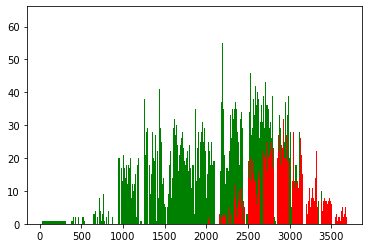

In [9]:
import sklearn.metrics as s

z = np.where(train.values[:,0] == 0)
o = np.where(train.values[:,0] == 1)

zeros = train.values[z]
ones = train.values[o]

zGenuine = s.pairwise_distances(zeros,metric='euclidean')
oGenuine = s.pairwise_distances(ones,metric='euclidean')
imposter = s.pairwise_distances(zeros,ones,metric='euclidean')

fig, ax = plt.subplots()

cg = []
ci = []
for i in range(zGenuine[1:100,1:100].shape[0]):
    cg.append("green")
    ci.append("red")
    
ax.hist(zGenuine[1:100,1:100], color = cg)
ax.hist(oGenuine[1:100,1:100],color = cg)
ax.hist(imposter[1:100,1:100], color = ci)
plt.show()

<b/>(f) Generate an ROC curve from the above sets of distances. What is the equal error rate? What is the error rate of a classifier that simply guesses randomly?</b><br/><br/>
To generate a ROC curve from the pairwise distances calculated in (e), first I made two 1D arrays, one of genuine distances and one of imposter distances from my three 2D arrays from (e), sorting them in order of ascending distances.  Then, I made a threshold vector which ranges in equal intervals from the lowest distance found to the highest distance found, so that we can sweep through the distance arrays and find the corresponding genuine acceptance rates and imposter acceptance rates at each threshold.  The genuine acceptance rates correspond to the number of elements found whose distances are smaller than the threshold, i.e. these elements would be captured and correctly classified in the thresholded distance, divided by the total number of elements.  The imposter acceptance rates correspond to the number of elements found whose distances are smaller than the threshold, i.e. these elements would be captured and incorrectly classified in the thresholded distance, divided by the total number of elements.  The equal error rate is the rate at which the false acceptance rate is equal to the false rejection rate, which in this case corresponds to the imposter acceptance rate where the orange line intersects the ROC curve: 0.0001 (not normalized – normalized this would correspond to 0.2).  This means that approximately 80% are guessed correctly and 20% are guessed incorrectly. The equal error rate of a classifier which guesses randomly would be 0.5 (normalized), since 50% of the guesses would be correct, and 50% would be incorrect.

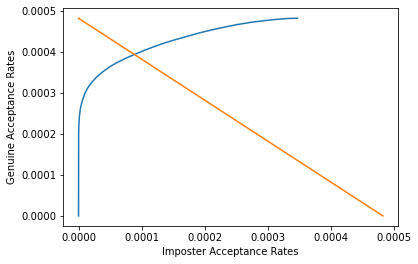

In [10]:
zgUpper = zGenuine[np.triu_indices(784)]
ogUpper = oGenuine[np.triu_indices(784)]
imUpper = imposter[np.triu_indices(784)]

genuine = np.concatenate((zgUpper.reshape(307720),ogUpper.reshape(307720)))
imp = imUpper.reshape(307720)

genuine = np.sort(genuine)
imp = np.sort(imp)

thresholds = np.linspace(np.amin(genuine),np.amax(imp),num=1000)
GAR = []
FAR = []
i = 0
while i < np.size(thresholds):
    GAR.append((genuine<thresholds[i]).sum()/genuine.sum())
    FAR.append((imp<thresholds[i]).sum()/imp.sum())
    i+=1
  
plt.plot(FAR,GAR)
x = [max(GAR),0]
y = [0,max(GAR)]
plt.plot(x,y)
plt.xlabel("Imposter Acceptance Rates")
plt.ylabel("Genuine Acceptance Rates")
plt.show()

<b/>(g) Implement a K-NN classifier.</b><br/><br/>
To implement a KNN classifier, I created a function that took as an input a K parameter, and a single vector containing the 784 pixels of one sample to be classified.  The classifier calculates the Euclidean distance between the sample-to-be-classified and the entire training set, then finds the K elements with the smallest distances (K nearest neighbors).  Of these K neighbors, the mode of their labels is then calculated which corresponds to the guess of the sample-to-beclassified’s classification.  Testing this classifier on random rows of the training dataset proved correct.

In [11]:
from scipy import stats
def my_classifier(k,features_of_target):
    dist = np.linalg.norm(features_of_target-train.values[:,1:785],axis=1)
    s = np.argsort(dist)
    neighbors = s[1:k+1]
    result = stats.mode(train.values[neighbors,0])
    guess = result[0][0]
    return guess

In [12]:
my_classifier(3,train.values[8,1:]) #test classifer cell

5

<b/>(h) Take 15% of your dataset and make it your holdout set. Train the classifier on the remaining data, using different values of K and use the holdout set to determine the best value of K . Print a table showing the values of K you tried as well as their training and holdout accuracy. Report the best value of K that you found.</b><br/>

We test very k within range(1,10) to test the accuracy of training data and hold out data, the result is not shown and we have waited for very long, we will pick the k with the highest accuracy for both datasets. 

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
data_train = pd.read_csv('train.csv')
x_train = data_train.iloc[:,1:].values
y_train = data_train.iloc[:,0].values
train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size = 0.15, random_state=123)

#Holdout
k = list(range(1,10))
pred_y_list =[]
for i in k:
    for j in range (x_train.shape[0]):
        pred_y = my_classifier(3,x_train[j,:])
        pred_y_list.append(pred_y)
    accuracy = r2_score(test_y,pred_y)
    print("k = ",str(i+1),", Holdout set accuracy = ",str(accuracy))

#Train
k = list(range(1,10))
pred_y_list =[]
for i in k:
    for j in range (x_train.shape[0]):
        pred_y = my_classifier(3,x_train[j,:])
        pred_y_list.append(pred_y)
    accuracy = r2_score(train_y,pred_y)
    print("k = ",str(i+1),", Holdout set accuracy = ",str(accuracy))

<b/>(i) Generate a confusion matrix (of size 10×10) from your results. Which digits are particularly tricky to classify?</b><br/><br/>
To generate a confusion matrix, you first must generate predicted classifications using the training dataset, its corresponding labels, and specifying the fold (in this case 3) used for cross validation.  In the corresponding confusion matrix, one dimension refers to the guesses while the other refers to the actual classifications, such that the diagonals of the matrix show the number of samples that are correctly classified.

In [42]:
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier() 
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(KNN, train.values[:,1:], train.values[:,0], cv=3) 

from sklearn.metrics import confusion_matrix 
m = confusion_matrix(train.values[:, 0], y_pred) 
print(m) 

[[4104    1    4    0    0    7   12    2    0    2]
 [   0 4660    9    2    1    0    2    7    1    2]
 [  35   62 3961   12    3    5    3   85    8    3]
 [   5   13   27 4192    0   45    1   24   24   20]
 [   2   50    0    0 3905    0   14    7    2   92]
 [  10    9    2   72    3 3621   48    3    4   23]
 [  25    7    1    0    4   17 4082    0    1    0]
 [   2   61   11    3   13    0    0 4265    0   46]
 [  19   49   19   78   22   78   20   13 3722   43]
 [  16   12    3   35   48    9    1   69   10 3985]]


<b/>(j) Train your classifier with all of the training data, and test your classifier with the test data. Submit your results to Kaggle.</b><br/><br/>
Using python’s KNN classifier to train on our training data and test on the full set of test data, the accuracy returned a score of 96.7% on Kaggle.

In [ ]:
import pandas as pd
testFile = '/Users/virginialu/Desktop/Cornell Tech/Fall 2020/Applied Machine Learning/Homeworks/HW 1/test.csv'
testFull = np.loadtxt(testFile,delimiter=',',skiprows=1)

KNN.fit(train.values[:,1:],train.values[:,0]) # fit on training data
predictions = KNN.predict(test.values)
#new_pd = pd.DataFrame(predictions)
predictions.to_csv(r'/Users/virginialu/Desktop/Cornell Tech/Fall 2020/Applied Machine Learning/Homeworks/HW 1/MNISTClassified.csv')